#Data Preprocessing

In [1]:
# import pandas as pd

# # Load your dataset
# df = pd.read_csv("/content/dataset.csv")

# # Group by the 'Header' and concatenate nucleotides into a sequence
# df['Nucleotide Sequence'] = df.groupby('Header')['Nucleotide'].transform(lambda x: ''.join(x))

# # Drop duplicates to keep only one row per sequence
# df = df.drop_duplicates(subset=['Header', 'Nucleotide Sequence'])

# # Save the modified dataset
# df.to_csv("/content/newdataset.csv", index=False)


In [2]:
# Install dependencies
!apt-get update
!apt-get install -y build-essential libgsl-dev libmpfr-dev

# Download ViennaRNA source code
!wget https://www.tbi.univie.ac.at/RNA/download/sourcecode/2_4_x/ViennaRNA-2.4.17.tar.gz

# Extract the files
!tar -xvzf ViennaRNA-2.4.17.tar.gz


Streaming output truncated to the last 5000 lines.
ViennaRNA-2.4.17/doc/html/aln__util_8h__incl.svg
ViennaRNA-2.4.17/doc/html/form_99.png
ViennaRNA-2.4.17/doc/html/zscore_8h_source.html
ViennaRNA-2.4.17/doc/html/equilibrium__probs_8h.js
ViennaRNA-2.4.17/doc/html/group__perturbation.svg
ViennaRNA-2.4.17/doc/html/group__aln__utils.svg
ViennaRNA-2.4.17/doc/html/form_14.png
ViennaRNA-2.4.17/doc/html/landscape_2findpath_8h__incl_org.svg
ViennaRNA-2.4.17/doc/html/decomp_ext_stem.svg
ViennaRNA-2.4.17/doc/html/read__epars_8h__incl.svg
ViennaRNA-2.4.17/doc/html/structvrna__param__s__coll__graph.md5
ViennaRNA-2.4.17/doc/html/landscape_2findpath_8h__incl.map
ViennaRNA-2.4.17/doc/html/navtreeindex6.js
ViennaRNA-2.4.17/doc/html/form_124.png
ViennaRNA-2.4.17/doc/html/group__model__details.md5
ViennaRNA-2.4.17/doc/html/findpath_8h__incl.svg
ViennaRNA-2.4.17/doc/html/group__neighbors_structvrna__move__s.js
ViennaRNA-2.4.17/doc/html/convert__epars_8h__incl.map
ViennaRNA-2.4.17/doc/html/functions_e.html

In [3]:
# Change directory to the ViennaRNA folder
%cd ViennaRNA-2.4.17

# Configure and compile
!./configure
!make
!make install


/content/ViennaRNA-2.4.17
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking how to run the C preprocessor... gcc -E
checking for grep that handles long lines and -e... /usr/bin/grep
checking for egrep... /usr/bin/grep -E
checking for ANSI C header files... yes
checking for sys/types.h... yes
checking for sys/stat.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for memory.h... yes
checking for strings.h... yes
checking for inttypes.h... yes
checking for stdint.h... yes
checking for unistd.h... yes
checking minix/config.h usability... no
checkin

In [4]:
!RNAfold --version

RNAfold 2.4.17


##Making of Dataset

In [5]:
import pandas as pd
import subprocess

# Sample dataset with nucleotide sequences
df = pd.read_csv('/content/newdataset.csv')

# Initialize a new list to store structures
structures = []

for seq in df['Nucleotide Sequence']:
    # Run RNAfold to predict the secondary structure
    process = subprocess.run(['RNAfold'], input=seq, capture_output=True, text=True)
    result = process.stdout.strip().split('\n')
    structure = result[1].split()[0]
    structures.append(structure)

# Add the predicted structures as a new column in the dataframe
df['Structure'] = structures


df.to_csv('/content/newdataset1.csv', index=False)


In [6]:
df.head()

,Header,Position,Nucleotide,A,U,G,C,Nucleotide Sequence,Structure
0,2XNZ_1_A_A,1,G,0,0,1,0,GACAUAUAAUCGCGUGGAUAUGGCACGCAAGUUUCUACCGGGCACC...,((((((.....(((((.......)))))..........((((((.....
1,3D2V_1_A_A,1,G,0,0,1,0,GGGACCAGGGGUGCUUGUUCACAGGCUGAGAAAGUCCCUUUGAACC...,(((((.......(((((....))))).......)))))......((...
2,3LA5_1_A_A,1,G,0,0,1,0,GGCUUCAUAUAAUCCGAAUGAUAUGGUUUCGGAGCUUCCACCAAGA...,(((((((((...((((((.........))))))........(((((...
3,3P4C_1_B_B,1,G,0,0,1,0,GAUG,....
4,3PDR_1_X_X,1,G,0,0,1,0,GGGCUUCGUUAGGUGAGGCUCCUGUAUGGAGAUACGCUGCUGCCCA...,((((((((....(((.(((((((((((((......(((((.(((((...


#LSTM

In [7]:
import pandas as pd
import numpy as np

# Load the DataFrame
df = pd.read_csv('/content/newdataset1.csv')
df.head()


,Header,Position,Nucleotide,A,U,G,C,Nucleotide Sequence,Structure
0,2XNZ_1_A_A,1,G,0,0,1,0,GACAUAUAAUCGCGUGGAUAUGGCACGCAAGUUUCUACCGGGCACC...,((((((.....(((((.......)))))..........((((((.....
1,3D2V_1_A_A,1,G,0,0,1,0,GGGACCAGGGGUGCUUGUUCACAGGCUGAGAAAGUCCCUUUGAACC...,(((((.......(((((....))))).......)))))......((...
2,3LA5_1_A_A,1,G,0,0,1,0,GGCUUCAUAUAAUCCGAAUGAUAUGGUUUCGGAGCUUCCACCAAGA...,(((((((((...((((((.........))))))........(((((...
3,3P4C_1_B_B,1,G,0,0,1,0,GAUG,....
4,3PDR_1_X_X,1,G,0,0,1,0,GGGCUUCGUUAGGUGAGGCUCCUGUAUGGAGAUACGCUGCUGCCCA...,((((((((....(((.(((((((((((((......(((((.(((((...


###One Hot Encoding of DataSet

In [8]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/newdataset1.csv')

# Define the nucleotides
nucleotides = ['A', 'U', 'G', 'C']
max_length = max(df['Nucleotide Sequence'].str.len())  # Get the maximum length of nucleotide sequences

# Create a mapping for nucleotides
one_hot_map = {nucleotide: i for i, nucleotide in enumerate(nucleotides)}

# Function to one-hot encode a sequence of nucleotides
def one_hot_encode_sequence(sequence):
    one_hot = np.zeros((max_length, len(nucleotides)), dtype=int)  # Initialize with zeros
    for i, nucleotide in enumerate(sequence):
        if nucleotide in one_hot_map:
            one_hot[i, one_hot_map[nucleotide]] = 1
    return one_hot

# Apply the one-hot encoding to each nucleotide sequence
one_hot_encoded_data = df['Nucleotide Sequence'].apply(one_hot_encode_sequence)

# Stack the one-hot encoded arrays into a single array
one_hot_encoded_flat = np.stack(one_hot_encoded_data.values)

# Reshape to (number_of_sequences, max_length * number_of_nucleotides)
one_hot_encoded_flat = one_hot_encoded_flat.reshape(one_hot_encoded_flat.shape[0], -1)

# Create a DataFrame from the flattened one-hot encoded data
one_hot_df = pd.DataFrame(one_hot_encoded_flat)

# Concatenate the original DataFrame with the one-hot encoded nucleotides
encoded_df = pd.concat([df[['Header', 'Nucleotide Sequence', 'Structure']], one_hot_df], axis=1)


encoded_df.to_csv('dataset.csv', index=False)
print("One-hot encoded data has been saved to 'dataset.csv'")


One-hot encoded data has been saved to 'dataset.csv'


##Train the Model

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/dataset.csv')

# Extract the one-hot encoded nucleotide features (X)
X = df.iloc[:, 3:].values  # Exclude 'Header', 'Nucleotide Sequence', and 'Structure' columns

# Map the structure symbols to numerical values
structure_map = {'.': 0, '(': 1, ')': 2}
Y_sequences = df['Structure'].apply(lambda x: [structure_map[char] for char in x]).tolist()

# Ensure X and Y have compatible shapes
num_samples = min(len(X), len(Y_sequences))  # Adjust to the smallest sample count if needed
X = X[:num_samples]

# Reshape X for LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], -1, 4)

# Pad Y sequences to match the number of timesteps in X
Y_padded = pad_sequences(Y_sequences, maxlen=X.shape[1], padding='post', value=0)

# Convert Y_padded to a numpy array
Y = np.array(Y_padded)

print("X: ",X)

print("Y: ",Y)

X:  [[[0 0 1 0]
  [1 0 0 0]
  [0 0 0 1]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 1 0]
  [0 0 1 0]
  [0 0 1 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 1 0]
  [0 0 1 0]
  [0 0 0 1]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 1 0]
  [0 1 0 0]
  [0 0 1 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 1 0]
  [0 1 0 0]
  [0 0 1 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 1 0]
  [0 0 1 0]
  [0 1 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
Y:  [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np
import tensorflow as tf

In [26]:
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        y_true_one_hot = tf.one_hot(y_true, depth=y_pred.shape[-1])
        cross_entropy = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
        weight = tf.pow(1 - tf.reduce_max(y_pred * y_true_one_hot, axis=-1), gamma)
        focal_loss = alpha * weight * cross_entropy
        return focal_loss
    return focal_loss_fixed

In [34]:
# Preprocess X and Y as before, then ensure correct shape for Y
Y_padded = pad_sequences(Y_sequences, maxlen=X.shape[1], padding='post', value=0)
Y = np.array(Y_padded)

# Ensure shape is correct for sparse categorical cross-entropy
Y = Y.reshape(Y.shape[0], Y.shape[1])

# Split dataset into training, validation, and test sets (e.g., 70% train, 15% validation, 15% test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Define model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    Dense(3, activation='softmax')
])

# Compile the model with focal loss
model.compile(loss=focal_loss(gamma=2., alpha=0.25), optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=100,
    batch_size=32
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5634 - loss: 0.1213 - val_accuracy: 0.8317 - val_loss: 0.1158
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.8768 - loss: 0.1143 - val_accuracy: 0.8306 - val_loss: 0.1086
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.8837 - loss: 0.1055 - val_accuracy: 0.8306 - val_loss: 0.0982
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.8834 - loss: 0.0915 - val_accuracy: 0.8306 - val_loss: 0.0819
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.8858 - loss: 0.0661 - val_accuracy: 0.8306 - val_loss: 0.0812
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.8775 - loss: 0.0545 - val_accuracy: 0.8306 - val_loss: 0.0687
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.8803 - loss: 0.0448 - val_accuracy: 0.8306 - val_loss: 0.0533
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.8827 - loss: 0.0384 - val_accuracy: 0.8306 - val_loss: 0.0496

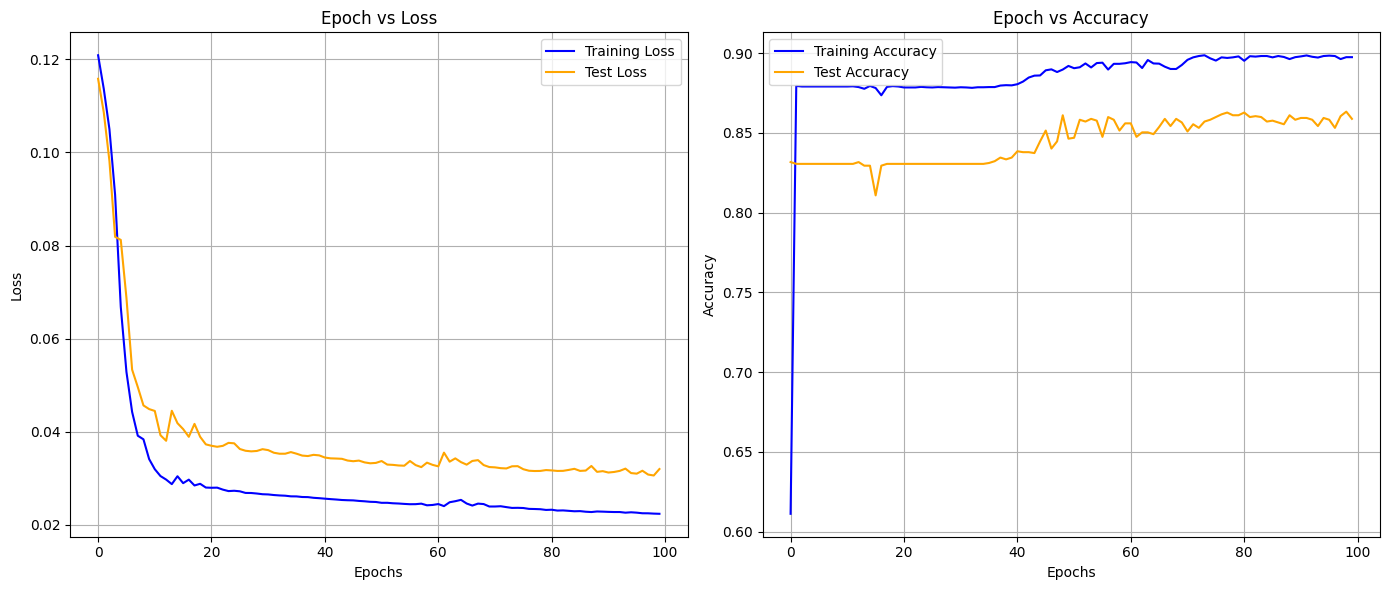

In [35]:
# Plotting loss and accuracy
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Test Loss', color='orange')
plt.title('Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [36]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9063 - loss: 0.0502
Test Loss: 0.05023910477757454
Test Accuracy: 0.9063146710395813


In [37]:
test_loss, test_accuracy = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {test_loss:.4f}")
print(f"Validation Accuracy: {test_accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8588 - loss: 0.0320
Validation Loss: 0.0320
Validation Accuracy: 0.8588


In [38]:
predictions = model.predict(X_val)
predictions_classes = np.argmax(predictions, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


In [39]:
for i in range(5):  # Show 5 samples
    print(f"True Structure:    {Y_val[i]}")
    print(f"Predicted Structure: {predictions_classes[i]}")
    print("\n")


True Structure:    [1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Structure: [1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 0 2 2 0 0 0 0 0 0 0 0 2 2 2 0 2 2 0 0 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


True Structure:    [1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [32]:
structure_map_inv = {0: '.', 1: '(', 2: ')'}
predicted_structure = ["".join([structure_map_inv[char] for char in seq]) for seq in predictions_classes]


###Calculating F1 score

In [40]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Get predictions from the model and convert them to class labels (0, 1, 2)
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=-1)  # Convert probabilities to class labels

# Flatten y_test and y_pred_labels for compatibility with metrics
y_test_flat = Y_test.flatten()
y_pred_flat = y_pred_labels.flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test_flat, y_pred_flat)

# Calculate F1 scores for each class (0 for '.', 1 for '(', 2 for ')')
f1_scores = f1_score(y_test_flat, y_pred_flat, average=None, labels=[0, 1, 2])

# Print results
print("Evaluation Results:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score for '.': {f1_scores[0]:.2f}")
print(f"F1 Score for '(': {f1_scores[1]:.2f}")
print(f"F1 Score for ')': {f1_scores[2]:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test_flat, y_pred_flat, labels=[0, 1, 2], target_names=['.', '(', ')']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Evaluation Results:
Accuracy: 90.63%
F1 Score for '.': 0.95
F1 Score for '(': 0.47
F1 Score for ')': 0.33

Detailed Classification Report:
              precision    recall  f1-score   support

           .       0.93      0.98      0.95      1722
           (       0.56      0.40      0.47       105
           )       0.50      0.25      0.33       105

    accuracy                           0.91      1932
   macro avg       0.66      0.54      0.58      1932
weighted avg       0.89      0.91      0.89      1932



##Energy

In [21]:
!pip install seqfold

##minimum free energy (MFE)

In [24]:
import pandas as pd
from seqfold import fold, dg, dot_bracket
import re

# Load your RNA dataset
df = pd.read_csv('/content/rna_sequences.csv')

# Define a function to clean sequence and calculate MFE and dot-bracket notation
def calculate_mfe_and_dot_bracket(sequence):
    # Keep only valid RNA bases
    cleaned_seq = re.sub(r'[^AUGC]', '', sequence.upper())

    # Calculate MFE
    mfe = dg(cleaned_seq, temp=37.0)

    # Get the folded structures for additional details
    structs = fold(cleaned_seq)

    # Get dot-bracket notation
    dot_bracket_notation = dot_bracket(cleaned_seq, structs)

    return mfe, dot_bracket_notation

# Apply the function to each sequence in the dataset, with error handling
df[['MFE', 'Dot Bracket Notation']] = df['Nucleotide Sequence'].apply(
    lambda seq: pd.Series(calculate_mfe_and_dot_bracket(seq))
)

# Save the results to a new CSV file
df.to_csv('/content/rna_sequences_with_mfe.csv', index=False)

print("Calculation complete. Results saved in 'rna_sequences_with_mfe.csv'")


Calculation complete. Results saved in 'rna_sequences_with_mfe.csv'


##bond energy of RNA structures

In [25]:
import pandas as pd

# Load the RNA dataset
df = pd.read_csv('/content/rna_sequences.csv')

# Bond pair energies in kcal/mol for RNA base pairs
bond_energies = {
    'AU': -2.1,
    'UA': -2.1,
    'GC': -3.4,
    'CG': -3.4,
    'GU': -0.9,
    'UG': -0.9
}

def calculate_bond_energy(structure, sequence):
    """
    Calculates bond energy for an RNA structure based on base pair types.

    Parameters:
    structure (str): Dot-bracket notation of the RNA structure.
    sequence (str): Nucleotide sequence corresponding to the structure.

    Returns:
    float: Total bond energy of the RNA structure.
    """
    stack = []
    total_energy = 0.0

    # Traverse each nucleotide in the structure
    for i, char in enumerate(structure):
        if char == '(':  # Opening bracket, push to stack
            stack.append(i)
        elif char == ')':  # Closing bracket, pop from stack and calculate energy
            if stack:
                j = stack.pop()
                pair = sequence[j] + sequence[i]  # Form the base pair

                # Retrieve energy if pair is in dictionary, else assume zero
                pair_energy = bond_energies.get(pair, 0)
                total_energy += pair_energy

    return total_energy

# Calculate bond energies for each row in the dataset
df['Bond Energy'] = df.apply(lambda row: calculate_bond_energy(row['Structure'], row['Nucleotide Sequence']), axis=1)

# Save the updated DataFrame to a new CSV file
df.to_csv('/content/rna_sequences_with_bond_energy.csv', index=False)
